Connecting USB == PTP media
Holding Picture button + Wifi button + connecting USB == Mass storage
Holding Video button + connecting USB == Live streaming USB
Holding Picture button + connecting USB == PTP, nothing special
Holding Wifi button + connecting USB == PTP, nothing special

In [16]:
%run ThetaS.ipynb
# the firmware
# data = open('ap1_v131.frm','rb').read()
# data_out = open('firm.xor.1','rb').read()
# we now need to produce the list of xor keys, and apply to both Sections
# load unity.xor.keys.part1 as our key list and make some adjustments.
unity1 = FirmwarePart('unity.part1', 0x800, 0x200)
unity2 = FirmwarePart('unity.part2', 0x800, 0x200) # offset is 0x2a6400

In [17]:
# save keys to file
keys_1 = ['%0.8x' % (int(l,16)) for l in open('unity.xor.keys.part1', 'r').readlines()]
keys_2 = ['%0.8x' % (int(l,16)) for l in open('unity.xor.keys.part2', 'r').readlines()]
keys = list(keys_1)

unity1.apply_xor(keys_1)
unity2.apply_xor(keys_2)

5418/5418 sections Xor-ed
4714/4714 sections Xor-ed


In [4]:
# 0x0 UNITY file header at 0x0 - clear text
## 0x46 *R@z01firm6
## 0x54 ENQ'ENENQ' ( possible delimitor)
## 0x88 ap1_v131up
## 0x94 ENQ'ENENQ'

#x 0x800 start xor ?

#x 0x2c00 dhrystone strings at 0x2c00 to 0x3200 ? (bad xor)
#x 0x2a3c00 filenames, archive-like
#x 0x2a5a00 d44aea62 + ffffffff section

# 0x2a5c00 UNITY file header - clear text
## 0x48 z01firm8
## 0x54 ENQ'ENENQ' ( possible delimitor)
# ffffffff section to
#x 0x2a6400, same xor key 071969ed than 0x800. Next section seems to have different xor key


# ap1_v130.frm.part2.unxor.2 
# 000eff30 SOFTUNE REALOS/ARM is REALtime OS for ARM.COPYRIGHT(C) FUJITSU SEMICONDUCTOR LIMITED 1999
# 000f80d0 Shell Execute and RICOH
# 000fada0 H:/z01firm and 192.168.1.1, 255.255.255.0
# 000fe270 wlan/_ptpip_operation.c
# 001071e0 IPL Mount
# 0010ae20 RICOH Theta
# 0x0010ae9c-> 0x0010c816 Certificate bundle + private key
# ? 0x0010ea00 -> 0x00 to data.
# 0x00114440 acsensor, acceleration sensor usage help
# 0x00119b00 usb charging
# 0x0011a300 audio
# 0x0011d3c0 SharedMemory
# 0x0011ebb0 CtrlUpdater.c
# 0x00121270 JobSystem, NUMOF_SECTIONS
# 0x00123990 serviceSetID, passphrase, cameraSerialNumber
# 0x00127b00 DSCProperty.c
# 0x00128020 b:\P_MY00.bin b:\P_BOX00.bin
# 0x0012b090 Inventory
# 0x0012b910 boot.sequenceID
# ?bad decode after 0x00130000
# 0x0014eac0 Thermo_f.bin
# 0x0014f4b0 txt
# 0x001510f0 txt
# 0x001523d0 txt
# 0x00153570 txt
# 0x00153bb0 txt -> 0x0015c850
# 0x0015ceb0 Ricoh
# ?bad decode ?
# 0x0017ca00 RawCompress
# ?bad decode ? 0x189800

# strings
# Freescale embedded web server
#/mqx.html
#/mcf51cn128.html
#/towersystem.html

# wireless related
#aptest
#managed
#12345678


# files names at the end ? in gy130 part1
# 00390c00
# TO FIX 00390c00

# Starting basic xmodem transfer...
# there must be some sort of Serial debugging shell
# Shell>
# ../os/../firm/shell/shell.c
# serial_rea_dat(TASK_PORTID, &cPtr, 1)



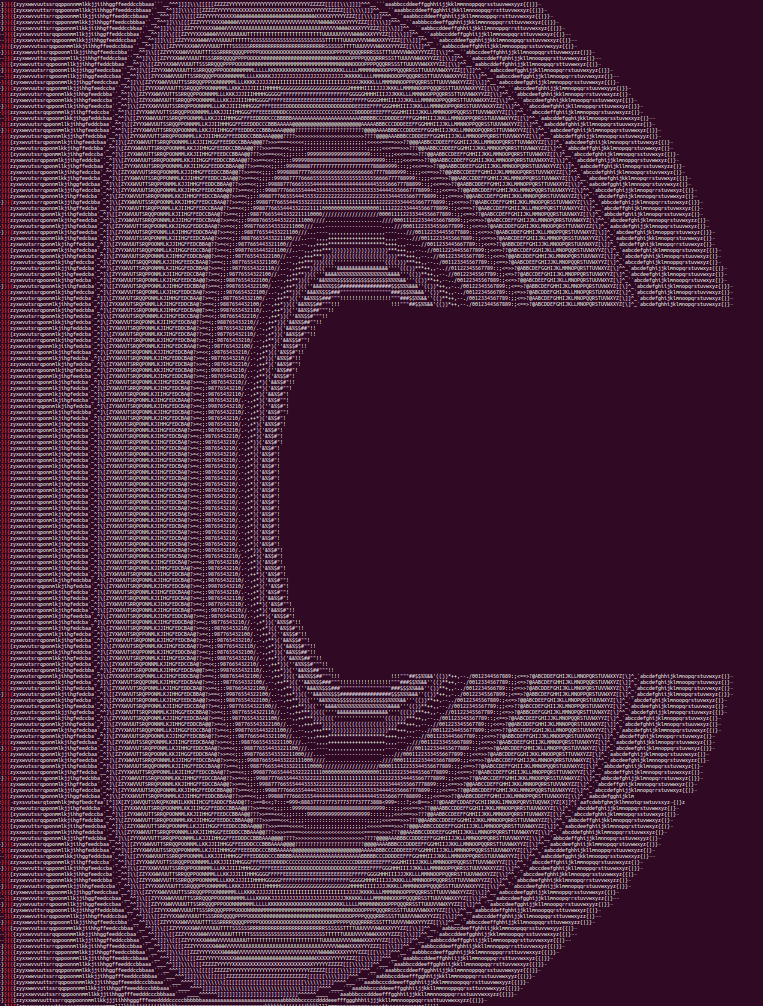

In [5]:

# 0x0017c700 most probably the lenses profiles
#  see strings gy1_v121.frm.part1.unxor.3 | grep -E 'mnop|ponm'
from IPython.display import Image
Image(filename='firmwares/unxor/lense-profile.png')

In [19]:
def change_key(section_index, new_key):
    unity1.sections[section_index].xor(binascii.unhexlify(new_key))
    try:
        unity2.sections[section_index].xor(binascii.unhexlify(new_key))
    except Exception:
        pass


    
# add change here
# change_key( 1, 'b72047a5' )
# change_key( 2, '7559f938' )
change_key( 17, '9abb60d5') # kt @0x00002bfc
change_key( 18, '58f51268') # revcase @0x00002c00
change_key( 19, '172ec3fb' ) # revcase 0x2d00
change_key( 20, 'd568758e' ) # revcase 0x3000
change_key( 21, '93a22721') # kt @0x00003200
change_key( 30, '43a9654c') # diff @0x00004400
change_key( 31, '01e316df') # kt @0x00004600
change_key( 32, 'c01cc872') # kt @0x00004800

change_key( 103, '821d0837') # revcase @0x0000d600
change_key( 104, '4056b9ca') # kt @0x0000d800


change_key( 309, '9489ec81') #  @0x00027200
change_key( 310, '52c39e14') # revcase @0x00027400

change_key( 1972, '4d52766e') # kt @0x000f71fc
change_key( 1974, 'c9c5d994') # kt @0x000f7400
# 0xf8000 unity2 "Shell_Execute"
change_key( 1981, 'fd59b499') # @0x000f8200
change_key( 1982, 'bb93662c') # kt @0x000f8400 - seems to indicate unity1 and unity2 keys are different ?
change_key( 1983, '79cd17bf') # comp @0x000f8600
change_key( 1984, '3806c952') # comp @0x000f8800
change_key( 1985, 'f6407ae5') # comp @0x000f8a00

change_key( 1986, '4b85d387') # ?? @0x000f8c00

change_key( 1989, 'ef274131') # comp @0x000f9200

change_key( 1992, '29d455ea') # @0x000f9800
# FF FF FF .... FE A9 55 00
# 00 00 00 .... 00 2A 7F D4
change_key( 1993, 'e80e077d') # @0x000f9a00
# FF FF FF .... FE A9 55 00
# 00 00 00 .... 00 2A 7F D4
change_key( 1994, 'a647b910') # @0x000f9c00

change_key( 1998, '9f2e7f5c') # @0x000fa400 unity2 ???
# unity1 -> 0xff from 0xfa860 -> 0xfaa20
# unity1 -> 0x00 from 0xfaa20 -> 0xfabe0
# unity1 -> 0xff from 0xfabe0 -> 0xfada0
# that is blocks of 0xc1c0, alternating between 0xff majority pattern to 0x00 majotiry pattern
# it seems that boundary are 02 7F D4

change_key( 2000, '1ba1e282') # @0x000fa800
# definitively, unity1 is alternating 0xff sections and 0x00 sections.

change_key( 2001, 'd9db9415') # @0x000faa00
change_key( 2002, '981545a8') # @0x000fac00
change_key( 2003, '564ef73b') # @0x000fae00

change_key( 4688, '796a6a02') # stats @0x0024a800
change_key( 4687, 'bb30b86f') # stats @0x0024a600
change_key( 4686, 'fcf706dc') # stats @0x0024a400

change_key( 4685, '3ebd5549') # @0x0024a200
change_key( 4689, '37a41b95') # @0x0024aa00
change_key( 4690, 'f5ddcd28') # @0x0024ac00
change_key( 4691, 'b4177ebb') # @0x0024ae00
change_key( 4692, '7251304e') # @0x0024b000
change_key( 4693, '308ae1e1') # @0x0024b200
change_key( 4694, 'eec49374') # @0x0024b400
change_key( 4696, '6b37f69a') # kt @0x0024b9fc
change_key( 4697, '2971a82d') # kt @0x0024bbfc
change_key( 4698, 'e7ab59c0') # kt @0x0024bdbc
# change_key( 4699, 'a5e50b53') # @0x0024bffc

change_key( 4700, '641ebce6') # kt 0x24c000
change_key( 4701, '22586e79') # @0x0024c200
#
change_key( 4703, '9ecbd19f') # @0x0024c600

change_key( 4710, 'd25faca4') # kt 0x24d400
change_key( 4711, '90995e37') # comp @0x0024d600
change_key( 4712, '4ed30fca') # comp @0x0024d800

change_key( 1, 'b72047a5') # kt auto @0x00000a00
change_key( 2, '7559f938') # kt auto @0x00000c00
change_key( 33, '7e567a05') # kt auto @0x00004a00
change_key( 34, '3c902b98') # kt auto @0x00004c00
change_key( 35, 'fac9dd2b') # kt auto @0x00004e00
change_key( 38, '3576f1e4') # kt auto @0x00005400
change_key( 39, 'f3b0a377') # kt auto @0x00005600
change_key( 41, '7024069d') # kt auto @0x00005a00
change_key( 1227, 'b76cb1a3') # kt auto @0x00099e00
change_key( 1228, '0ad91c49') # kt auto @0x0009a000
change_key( 1266, 'b236bf08') # kt auto @0x0009ec00
change_key( 1273, 'e5ca9a0d') # kt auto @0x0009fa00
change_key( 1280, '195e7512') # kt auto @0x000a0800
change_key( 1287, '4cf25017') # kt auto @0x000a1600
change_key( 1293, '3db38676') # kt auto @0x000a2200
change_key( 1294, '80862b1c') # kt auto @0x000a2400
change_key( 1295, 'c1402350') # kt auto @0x000a2600
change_key( 1300, '0a1fab71') # kt auto @0x000a3000
change_key( 1301, 'b41a0621') # kt auto @0x000a3200
change_key( 1302, '8dac484b') # kt auto @0x000a3400
change_key( 1307, 'd68bd06c') # kt auto @0x000a3e00
change_key( 1308, 'e7ade126') # kt auto @0x000a4000
change_key( 1309, '5a186d46') # kt auto @0x000a4200
change_key( 1314, 'a2f7f567') # kt auto @0x000a4c00
change_key( 1315, '1b41bc2b') # kt auto @0x000a4e00
change_key( 1316, '26849241') # kt auto @0x000a5000
change_key( 1321, '6f641a62') # kt auto @0x000a5a00
change_key( 1322, '4ed59730') # kt auto @0x000a5c00
change_key( 1323, 'f2f0b73c') # kt auto @0x000a5e00
change_key( 1328, '3bd03f5d') # kt auto @0x000a6800
change_key( 1329, '82697235') # kt auto @0x000a6a00
change_key( 1330, 'bf5cdc37') # kt auto @0x000a6c00
change_key( 1335, '083c6458') # kt auto @0x000a7600
change_key( 1336, 'b5fd4d3a') # kt auto @0x000a7800
change_key( 1337, '8bc90132') # kt auto @0x000a7a00
change_key( 1342, 'd4a88953') # kt auto @0x000a8400
change_key( 1343, 'e991283f') # kt auto @0x000a8600
change_key( 1344, '5835262d') # kt auto @0x000a8800
change_key( 1349, 'a114ae4e') # kt auto @0x000a9200
change_key( 1350, '1d250344') # kt auto @0x000a9400
change_key( 1351, '24a14b28') # kt auto @0x000a9600
change_key( 1356, '6d80d349') # kt auto @0x000aa000
change_key( 1357, '50b8de49') # kt auto @0x000aa200
change_key( 1358, 'f10d7023') # kt auto @0x000aa400
change_key( 1363, '39ecf844') # kt auto @0x000aae00
change_key( 1364, '844cb94e') # kt auto @0x000ab000
change_key( 1365, 'bd79951e') # kt auto @0x000ab200
change_key( 1370, '06591d3f') # kt auto @0x000abc00
change_key( 1371, 'b7e09453') # kt auto @0x000abe00
change_key( 1372, '89e5ba19') # kt auto @0x000ac000
change_key( 1377, 'd2c5423a') # kt auto @0x000aca00
change_key( 1378, 'eb746f58') # kt auto @0x000acc00
change_key( 1379, '5651df14') # kt auto @0x000ace00
change_key( 1384, '9f316735') # kt auto @0x000ad800
change_key( 1385, '1f084a5d') # kt auto @0x000ada00
change_key( 1386, '22be040f') # kt auto @0x000adc00
change_key( 1391, '6b9d8c30') # kt auto @0x000ae600
change_key( 1392, '529c2562') # kt auto @0x000ae800
change_key( 1393, 'ef2a290a') # kt auto @0x000aea00
change_key( 1398, '3809b12b') # kt auto @0x000af400
change_key( 1399, '86300067') # kt auto @0x000af600
change_key( 1400, 'bb964e05') # kt auto @0x000af800
change_key( 1405, '0475d626') # kt auto @0x000b0200
change_key( 1406, 'b9c3db6c') # kt auto @0x000b0400
change_key( 1407, '88027300') # kt auto @0x000b0600
change_key( 1412, 'd0e1fb21') # kt auto @0x000b1000
change_key( 1413, 'ed57b671') # kt auto @0x000b1200
change_key( 1414, '546e97fb') # kt auto @0x000b1400
change_key( 1419, '9d4e201c') # kt auto @0x000b1e00
change_key( 1420, '20eb9176') # kt auto @0x000b2000
change_key( 1421, '20dabcf6') # kt auto @0x000b2200
change_key( 1426, '69ba4517') # kt auto @0x000b2c00
change_key( 1427, '547f6c7b') # kt auto @0x000b2e00
change_key( 1428, 'ed46e1f1') # kt auto @0x000b3000
change_key( 1433, '36266a12') # kt auto @0x000b3a00
change_key( 1434, '88134780') # kt auto @0x000b3c00
change_key( 1435, 'b9b306ec') # kt auto @0x000b3e00
change_key( 1440, '02928f0d') # kt auto @0x000b4800
change_key( 1441, 'bba72285') # kt auto @0x000b4a00
change_key( 1442, '861f2be7') # kt auto @0x000b4c00
change_key( 1447, 'cefeb408') # kt auto @0x000b5600
change_key( 1448, 'ef3afd8a') # kt auto @0x000b5800
change_key( 1449, '528b50e2') # kt auto @0x000b5a00
change_key( 1454, '9b6ad903') # kt auto @0x000b6400
change_key( 1455, '22ced88f') # kt auto @0x000b6600
change_key( 1456, '1ef775dd') # kt auto @0x000b6800
change_key( 1461, '67d6fdfe') # kt auto @0x000b7200
change_key( 1462, '5662b394') # kt auto @0x000b7400
change_key( 1463, 'eb639ad8') # kt auto @0x000b7600
change_key( 1468, '344322f9') # kt auto @0x000b8000
change_key( 1469, '89f68e99') # kt auto @0x000b8200
change_key( 1470, 'b7cfbfd3') # kt auto @0x000b8400
change_key( 1475, '00af47f4') # kt auto @0x000b8e00
change_key( 1476, 'bd8a699e') # kt auto @0x000b9000
change_key( 1477, '843be4ce') # kt auto @0x000b9200
change_key( 1482, 'cd1b6cef') # kt auto @0x000b9c00
change_key( 1483, 'f11e44a3') # kt auto @0x000b9e00
change_key( 1484, '50a809c9') # kt auto @0x000ba000
change_key( 1489, '998791ea') # kt auto @0x000baa00
change_key( 1490, '24b21fa8') # kt auto @0x000bac00
change_key( 1491, '1d142ec4') # kt auto @0x000bae00
change_key( 1496, '65f3b6e5') # kt auto @0x000bb800
change_key( 1497, '5845faad') # kt auto @0x000bba00
change_key( 1498, 'e98053bf') # kt auto @0x000bbc00
change_key( 1503, '325fdbe0') # kt auto @0x000bc600
change_key( 1504, '8bd9d5b2') # kt auto @0x000bc800
change_key( 1505, 'b5ec78ba') # kt auto @0x000bca00
change_key( 1510, 'fecc00db') # kt auto @0x000bd400
change_key( 1511, 'bf6db0b7') # kt auto @0x000bd600
change_key( 1512, '82589db5') # kt auto @0x000bd800
change_key( 1517, 'cb3825d6') # kt auto @0x000be200
change_key( 1518, 'f3018bbc') # kt auto @0x000be400
change_key( 1519, '4ec4c2b0') # kt auto @0x000be600
change_key( 1524, '97a44ad1') # kt auto @0x000bf000
change_key( 1525, '269566c1') # kt auto @0x000bf200
change_key( 1526, '1b30e7ab') # kt auto @0x000bf400
change_key( 1531, '64106fcc') # kt auto @0x000bfe00
change_key( 1532, '5a2941c6') # kt auto @0x000c0000
change_key( 1533, 'e79d0ca6') # kt auto @0x000c0200
change_key( 1538, '307c94c7') # kt auto @0x000c0c00
change_key( 1539, '8dbd1ccb') # kt auto @0x000c0e00
change_key( 1540, 'b40931a1') # kt auto @0x000c1000
change_key( 1545, 'fce8b9c2') # kt auto @0x000c1a00
change_key( 1546, 'c150f7d0') # kt auto @0x000c1c00
change_key( 1547, '8075569c') # kt auto @0x000c1e00
change_key( 1552, 'c954debd') # kt auto @0x000c2800
change_key( 1553, 'f4e4d2d5') # kt auto @0x000c2a00
change_key( 1554, '4ce17b97') # kt auto @0x000c2c00
change_key( 1559, '95c103b8') # kt auto @0x000c3600
change_key( 1560, '2878adda') # kt auto @0x000c3800
change_key( 1561, '194da092') # kt auto @0x000c3a00
change_key( 1566, '622d28b3') # kt auto @0x000c4400
change_key( 1567, '5c0c88df') # kt auto @0x000c4600
change_key( 1568, 'e5b9c58d') # kt auto @0x000c4800
change_key( 1573, '2e994dae') # kt auto @0x000c5200
change_key( 1574, '8fa063e4') # kt auto @0x000c5400
change_key( 1575, 'b225ea88') # kt auto @0x000c5600
change_key( 1580, 'fb0572a9') # kt auto @0x000c6000
change_key( 1581, 'c3343ee9') # kt auto @0x000c6200
change_key( 1582, '7e920f83') # kt auto @0x000c6400
change_key( 1587, 'c77197a4') # kt auto @0x000c6e00
change_key( 1588, 'f6c819ee') # kt auto @0x000c7000
change_key( 1589, '4afe347e') # kt auto @0x000c7200
change_key( 1594, '93ddbc9f') # kt auto @0x000c7c00
change_key( 1595, '2a5bf4f3') # kt auto @0x000c7e00
change_key( 1596, '176a5979') # kt auto @0x000c8000
change_key( 1601, '6049e19a') # kt auto @0x000c8a00
change_key( 1602, '5defcff8') # kt auto @0x000c8c00
change_key( 1603, 'e3d67e74') # kt auto @0x000c8e00
change_key( 1608, '2cb60695') # kt auto @0x000c9800
change_key( 1609, '9183aafd') # kt auto @0x000c9a00
change_key( 1610, 'b042a36f') # kt auto @0x000c9c00
change_key( 1615, 'f9222b90') # kt auto @0x000ca600
change_key( 1616, 'c5178602') # kt auto @0x000ca800
change_key( 1617, '7caec86a') # kt auto @0x000caa00
change_key( 1622, 'c58e508b') # kt auto @0x000cb400
change_key( 1623, 'f8ab6107') # kt auto @0x000cb600
change_key( 1624, '491aed65') # kt auto @0x000cb800
change_key( 1629, '91fa7586') # kt auto @0x000cc200
change_key( 1630, '2c3f3c0c') # kt auto @0x000cc400
change_key( 1631, '15871260') # kt auto @0x000cc600
change_key( 1636, '5e669a81') # kt auto @0x000cd000
change_key( 1637, '5fd31711') # kt auto @0x000cd200
change_key( 1638, 'e1f3375b') # kt auto @0x000cd400
change_key( 1643, '2ad2bf7c') # kt auto @0x000cde00
change_key( 1644, '9366f216') # kt auto @0x000ce000
change_key( 1645, 'ae5f5c56') # kt auto @0x000ce200
change_key( 1650, 'f73ee477') # kt auto @0x000cec00
change_key( 1651, 'c6facd1b') # kt auto @0x000cee00
change_key( 1652, '7acb8151') # kt auto @0x000cf000
change_key( 1657, 'c3ab0972') # kt auto @0x000cfa00
change_key( 1658, 'fa8ea820') # kt auto @0x000cfc00
change_key( 1659, '4737a64c') # kt auto @0x000cfe00
change_key( 1664, '90172e6d') # kt auto @0x000d0800
change_key( 1665, '2e228325') # kt auto @0x000d0a00
change_key( 1666, '13a3cb47') # kt auto @0x000d0c00
change_key( 1671, '5c835368') # kt auto @0x000d1600
change_key( 1672, '61b65e2a') # kt auto @0x000d1800
change_key( 1673, 'e00ff042') # kt auto @0x000d1a00
change_key( 1678, '28ef7863') # kt auto @0x000d2400
change_key( 1679, '954a392f') # kt auto @0x000d2600
change_key( 1680, 'ac7c153d') # kt auto @0x000d2800
change_key( 1685, 'f55b9d5e') # kt auto @0x000d3200
change_key( 1686, 'c8de1434') # kt auto @0x000d3400
change_key( 1687, '78e83a38') # kt auto @0x000d3600
change_key( 1692, 'c1c7c259') # kt auto @0x000d4000
change_key( 1693, 'fc71ef39') # kt auto @0x000d4200
change_key( 1694, '45545f33') # kt auto @0x000d4400
change_key( 1699, '8e33e754') # kt auto @0x000d4e00
change_key( 1700, '3005ca3e') # kt auto @0x000d5000
change_key( 1701, '11c0842e') # kt auto @0x000d5200
change_key( 1706, '5aa00c4f') # kt auto @0x000d5c00
change_key( 1707, '6399a543') # kt auto @0x000d5e00
change_key( 1708, 'de2ca929') # kt auto @0x000d6000
change_key( 1713, '270c314a') # kt auto @0x000d6a00
change_key( 1714, '972d8048') # kt auto @0x000d6c00
change_key( 1715, 'aa98ce24') # kt auto @0x000d6e00
change_key( 1720, 'f3785645') # kt auto @0x000d7800
change_key( 1721, 'cac15b4d') # kt auto @0x000d7a00
change_key( 1722, '7704f31f') # kt auto @0x000d7c00
change_key( 1727, 'bfe47b40') # kt auto @0x000d8600
change_key( 1728, 'fe553652') # kt auto @0x000d8800
change_key( 1729, '4371181a') # kt auto @0x000d8a00
change_key( 1734, '8c50a03b') # kt auto @0x000d9400
change_key( 1735, '31e91157') # kt auto @0x000d9600
change_key( 1736, '0fdd3d15') # kt auto @0x000d9800
change_key( 1741, '58bcc536') # kt auto @0x000da200
change_key( 1742, '657cec5c') # kt auto @0x000da400
change_key( 1743, 'dc496210') # kt auto @0x000da600
change_key( 1748, '2528ea31') # kt auto @0x000db000
change_key( 1749, '9910c761') # kt auto @0x000db200
change_key( 1750, 'a8b5870b') # kt auto @0x000db400
change_key( 1755, 'f1950f2c') # kt auto @0x000dbe00
change_key( 1756, 'cca4a266') # kt auto @0x000dc000
change_key( 1757, '7521ac06') # kt auto @0x000dc200
change_key( 1762, 'be013427') # kt auto @0x000dcc00
change_key( 1763, '00387d6b') # kt auto @0x000dce00
change_key( 1764, '418dd101') # kt auto @0x000dd000
change_key( 1769, '8a6d5922') # kt auto @0x000dda00
change_key( 1770, '33cc5870') # kt auto @0x000ddc00
change_key( 1771, '0df9f5fc') # kt auto @0x000dde00
change_key( 1776, '56d97e1d') # kt auto @0x000de800
change_key( 1777, '67603375') # kt auto @0x000dea00
change_key( 1778, 'da661af7') # kt auto @0x000dec00
change_key( 1783, '2345a318') # kt auto @0x000df600
change_key( 1784, '9af40e7a') # kt auto @0x000df800
change_key( 1785, 'a6d23ff2') # kt auto @0x000dfa00
change_key( 1790, 'efb1c813') # kt auto @0x000e0400
change_key( 1791, 'ce87e97f') # kt auto @0x000e0600
change_key( 1792, '733e64ed') # kt auto @0x000e0800
change_key( 1797, 'bc1ded0e') # kt auto @0x000e1200
change_key( 1798, '021bc484') # kt auto @0x000e1400
change_key( 1799, '3faa89e8') # kt auto @0x000e1600
change_key( 1804, '888a1209') # kt auto @0x000e2000
change_key( 1805, '35af9f89') # kt auto @0x000e2200
change_key( 1806, '0c16aee3') # kt auto @0x000e2400
change_key( 1811, '54f63704') # kt auto @0x000e2e00
change_key( 1812, '69437a8e') # kt auto @0x000e3000
change_key( 1813, 'd882d3de') # kt auto @0x000e3200
change_key( 1818, '21625bff') # kt auto @0x000e3c00
change_key( 1819, '9cd75593') # kt auto @0x000e3e00
change_key( 1820, 'a4eef8d9') # kt auto @0x000e4000
change_key( 1825, 'edce80fa') # kt auto @0x000e4a00
change_key( 1826, 'd06b3098') # kt auto @0x000e4c00
change_key( 1827, '715b1dd4') # kt auto @0x000e4e00
change_key( 1832, 'ba3aa5f5') # kt auto @0x000e5800
change_key( 1833, '03ff0b9d') # kt auto @0x000e5a00
change_key( 1834, '3dc742cf') # kt auto @0x000e5c00
change_key( 1839, '86a6caf0') # kt auto @0x000e6600
change_key( 1840, '3792e6a2') # kt auto @0x000e6800
change_key( 1841, '0a3367ca') # kt auto @0x000e6a00
change_key( 1846, '5312efeb') # kt auto @0x000e7400
change_key( 1847, '6b26c1a7') # kt auto @0x000e7600
change_key( 1848, 'd69f8cc5') # kt auto @0x000e7800
change_key( 1853, '1f7f14e6') # kt auto @0x000e8200
change_key( 1854, '9eba9cac') # kt auto @0x000e8400
change_key( 1855, 'a30bb1c0') # kt auto @0x000e8600
change_key( 1860, 'ebeb39e1') # kt auto @0x000e9000
change_key( 1861, 'd24e77b1') # kt auto @0x000e9200
change_key( 1862, '6f77d6bb') # kt auto @0x000e9400
change_key( 1867, 'b8575edc') # kt auto @0x000e9e00
change_key( 1868, '05e252b6') # kt auto @0x000ea000
change_key( 1869, '3be3fbb6') # kt auto @0x000ea200
change_key( 1874, '84c383d7') # kt auto @0x000eac00
change_key( 1875, '39762dbb') # kt auto @0x000eae00
change_key( 1876, '085020b1') # kt auto @0x000eb000
change_key( 1881, '512fa8d2') # kt auto @0x000eba00
change_key( 1882, '6d0a08c0') # kt auto @0x000ebc00
change_key( 1883, 'd4bc45ac') # kt auto @0x000ebe00
change_key( 1888, '1d9bcdcd') # kt auto @0x000ec800
change_key( 1889, 'a09de3c5') # kt auto @0x000eca00
change_key( 1890, 'a1286aa7') # kt auto @0x000ecc00
change_key( 1895, 'ea07f2c8') # kt auto @0x000ed600
change_key( 1896, 'd431beca') # kt auto @0x000ed800
change_key( 1897, '6d948fa2') # kt auto @0x000eda00
change_key( 1902, 'b67417c3') # kt auto @0x000ee400
change_key( 1903, '07c599cf') # kt auto @0x000ee600
change_key( 1904, '3a00b49d') # kt auto @0x000ee800
change_key( 1909, '82e03cbe') # kt auto @0x000ef200
change_key( 1910, '3b5974d4') # kt auto @0x000ef400
change_key( 1911, '066cd998') # kt auto @0x000ef600
change_key( 1916, '4f4c61b9') # kt auto @0x000f0000
change_key( 1917, '6eed4fd9') # kt auto @0x000f0200
change_key( 1918, 'd2d8fe93') # kt auto @0x000f0400
change_key( 1923, '1bb886b4') # kt auto @0x000f0e00
change_key( 1924, 'a2812ade') # kt auto @0x000f1000
change_key( 1925, '9f45238e') # kt auto @0x000f1200
change_key( 1930, 'e824abaf') # kt auto @0x000f1c00
change_key( 1931, 'd61505e3') # kt auto @0x000f1e00
change_key( 1932, '6bb14889') # kt auto @0x000f2000
change_key( 1937, 'b490d0aa') # kt auto @0x000f2a00
change_key( 1938, '09a8e0e8') # kt auto @0x000f2c00
change_key( 1939, '381d6d84') # kt auto @0x000f2e00
change_key( 1944, '80fcf5a5') # kt auto @0x000f3800
change_key( 1945, '3d3cbbed') # kt auto @0x000f3a00
change_key( 1946, '0489927f') # kt auto @0x000f3c00
change_key( 1951, '4d691aa0') # kt auto @0x000f4600
change_key( 1952, '70d096f2') # kt auto @0x000f4800
change_key( 1953, 'd0f5b77a') # kt auto @0x000f4a00
change_key( 1958, '19d53f9b') # kt auto @0x000f5400
change_key( 1959, 'a46471f7') # kt auto @0x000f5600
change_key( 1960, '9d61dc75') # kt auto @0x000f5800
change_key( 1965, 'e6416496') # kt auto @0x000f6200
change_key( 1966, 'd7f84cfc') # kt auto @0x000f6400
change_key( 1967, '69ce0170') # kt auto @0x000f6600
change_key( 1979, '7f19ae8c') # kt auto @0x000f7e00
change_key( 1987, '72b3de0b') # kt auto @0x000f8e00
change_key( 1988, 'cf127061') # kt auto @0x000f9000
change_key( 1995, '9b7e955c') # kt auto @0x000f9e00
change_key( 2007, 'b0ca4278') # kt auto @0x000fb600
change_key( 2008, '0d6f6f1a') # kt auto @0x000fb800
change_key( 2009, '3456df52') # kt auto @0x000fba00
change_key( 2014, '7d366773') # kt auto @0x000fc400
change_key( 2015, '41034a1f') # kt auto @0x000fc600
change_key( 2016, '00c3044d') # kt auto @0x000fc800
change_key( 2021, '49a28c6e') # kt auto @0x000fd200
change_key( 2023, 'cd2f2948') # kt auto @0x000fd600
change_key( 2028, '160eb169') # kt auto @0x000fe000
change_key( 2029, 'a82b0029') # kt auto @0x000fe200
change_key( 2030, '999b4e43') # kt auto @0x000fe400
change_key( 2035, 'e27ad664') # kt auto @0x000fee00
change_key( 2036, 'dbbedb2e') # kt auto @0x000ff000
change_key( 2037, '6607733e') # kt auto @0x000ff200
change_key( 2042, 'aee6fb5f') # kt auto @0x000ffc00
change_key( 2043, '0f52b633') # kt auto @0x000ffe00
change_key( 2044, '32739839') # kt auto @0x00100000
change_key( 2049, '7b53205a') # kt auto @0x00100a00
change_key( 2050, '42e69138') # kt auto @0x00100c00
change_key( 2051, 'fedfbd34') # kt auto @0x00100e00
change_key( 2056, '47bf4555') # kt auto @0x00101800
change_key( 2058, 'cb4be22f') # kt auto @0x00101c00
change_key( 2063, '142b6a50') # kt auto @0x00102600
change_key( 2064, 'aa0e4742') # kt auto @0x00102800
change_key( 2065, '97b8072a') # kt auto @0x00102a00
change_key( 2070, 'e0978f4b') # kt auto @0x00103400
change_key( 2071, 'dda22247') # kt auto @0x00103600
change_key( 2072, '64242c25') # kt auto @0x00103800
change_key( 2077, 'ad03b446') # kt auto @0x00104200
change_key( 2078, '1135fd4c') # kt auto @0x00104400
change_key( 2079, '30905120') # kt auto @0x00104600
change_key( 2084, '796fd941') # kt auto @0x00105000
change_key( 2085, '44c9d851') # kt auto @0x00105200
change_key( 2086, 'fcfc761b') # kt auto @0x00105400
change_key( 2091, '45dbfe3c') # kt auto @0x00105e00
change_key( 2092, '785db356') # kt auto @0x00106000
change_key( 2093, 'c9689b16') # kt auto @0x00106200
change_key( 2098, '12482337') # kt auto @0x00106c00
change_key( 2100, '95d4c011') # kt auto @0x00107000
change_key( 2105, 'deb44832') # kt auto @0x00107a00
change_key( 2106, 'df856960') # kt auto @0x00107c00
change_key( 2107, '6240e50c') # kt auto @0x00107e00
change_key( 2112, 'ab206d2d') # kt auto @0x00108800
change_key( 2113, '13194465') # kt auto @0x00108a00
change_key( 2114, '2ead0a07') # kt auto @0x00108c00
change_key( 2119, '778c9228') # kt auto @0x00109600
change_key( 2121, 'fb192f02') # kt auto @0x00109a00
change_key( 2126, '43f8b723') # kt auto @0x0010a400
change_key( 2128, '387aac02') # kt auto @0x0010a800
change_key( 2128, 'c78553fd') # kt auto @0x0010a800
change_key( 2130, 'b4ee0f28') # kt auto @0x0010ac00
change_key( 2133, '1064dc1e') # kt auto @0x0010b200
change_key( 2134, 'add4d574') # kt auto @0x0010b400
change_key( 2135, '93f178f8') # kt auto @0x0010b600
change_key( 2140, 'dcd10119') # kt auto @0x0010c000
change_key( 2141, 'e168b079') # kt auto @0x0010c200
change_key( 2142, '605d9df3') # kt auto @0x0010c400
change_key( 2145, 'da4f76c5') # kt auto @0x0010ca00
change_key( 2147, '56c2d9eb') # kt auto @0x0010ce00
change_key( 2147, 'a93d2614') # kt auto @0x0010ce00
change_key( 2149, '2cc9c2ee') # kt auto @0x0010d200
change_key( 2154, '75a94b0f') # kt auto @0x0010dc00
change_key( 2156, 'f935e7e9') # kt auto @0x0010e000
change_key( 2159, '41772ccf') # kt auto @0x0010e600
change_key( 2161, '4215700a') # kt auto @0x0010ea00
change_key( 2162, '7c244188') # kt auto @0x0010ec00
change_key( 2163, 'c5a20ce4') # kt auto @0x0010ee00
change_key( 2168, '0e819505') # kt auto @0x0010f800
change_key( 2169, 'afb81c8d') # kt auto @0x0010fa00
change_key( 2170, '920e31df') # kt auto @0x0010fc00
change_key( 2175, 'daedba00') # kt auto @0x00110600
change_key( 2176, 'e34bf792') # kt auto @0x00110800
change_key( 2177, '5e7a56da') # kt auto @0x00110a00
change_key( 2182, 'a759defb') # kt auto @0x00111400
change_key( 2183, '16dfd297') # kt auto @0x00111600
change_key( 2184, '2ae67bd5') # kt auto @0x00111800
change_key( 2189, '73c603f6') # kt auto @0x00112200
change_key( 2190, '4a73ad9c') # kt auto @0x00112400
change_key( 2191, 'f752a0d0') # kt auto @0x00112600
change_key( 2196, '403228f1') # kt auto @0x00113000
change_key( 2197, '7e0788a1') # kt auto @0x00113200
change_key( 2198, 'c3bec5cb') # kt auto @0x00113400
change_key( 2203, '0c9e4dec') # kt auto @0x00113e00
change_key( 2204, 'b19b63a6') # kt auto @0x00114000
change_key( 2205, '902aeac6') # kt auto @0x00114200
change_key( 2210, 'd90a72e7') # kt auto @0x00114c00
change_key( 2211, 'e52f3eab') # kt auto @0x00114e00
change_key( 2212, '5c970fc1') # kt auto @0x00115000
change_key( 2217, 'a57697e2') # kt auto @0x00115a00
change_key( 2218, '18c319b0') # kt auto @0x00115c00
change_key( 2219, '290334bc') # kt auto @0x00115e00
change_key( 2224, '71e2bcdd') # kt auto @0x00116800
change_key( 2225, '4c56f4b5') # kt auto @0x00116a00
change_key( 2226, 'f56f59b7') # kt auto @0x00116c00
change_key( 2231, '3e4ee1d8') # kt auto @0x00117600
change_key( 2233, 'c1db7eb2') # kt auto @0x00117a00
change_key( 2238, '0abb06d3') # kt auto @0x00118400
change_key( 2239, 'b37eaabf') # kt auto @0x00118600
change_key( 2240, '8e47a3ad') # kt auto @0x00118800
change_key( 2245, 'd7272bce') # kt auto @0x00119200
change_key( 2246, 'e71285c4') # kt auto @0x00119400
change_key( 2247, '5ab3c8a8') # kt auto @0x00119600
change_key( 2252, 'a39350c9') # kt auto @0x0011a000
change_key( 2253, '1aa660c9') # kt auto @0x0011a200
change_key( 2254, '271feda3') # kt auto @0x0011a400
change_key( 2259, '6fff75c4') # kt auto @0x0011ae00
change_key( 2260, '4e3a3bce') # kt auto @0x0011b000
change_key( 2261, 'f38c129e') # kt auto @0x0011b200
change_key( 2266, '3c6b9abf') # kt auto @0x0011bc00
change_key( 2267, '81ce16d3') # kt auto @0x0011be00
change_key( 2268, 'bff83799') # kt auto @0x0011c000
change_key( 2273, '08d7bfba') # kt auto @0x0011ca00
change_key( 2274, 'b561f1d8') # kt auto @0x0011cc00
change_key( 2275, '8c645c94') # kt auto @0x0011ce00
change_key( 2280, 'd543e4b5') # kt auto @0x0011d800
change_key( 2281, 'e8f5ccdd') # kt auto @0x0011da00
change_key( 2282, '58d0818f') # kt auto @0x0011dc00
change_key( 2287, 'a1b009b0') # kt auto @0x0011e600
change_key( 2288, '1c89a7e2') # kt auto @0x0011e800
change_key( 2289, '253ca68a') # kt auto @0x0011ea00
change_key( 2294, '6e1c2eab') # kt auto @0x0011f400
change_key( 2295, '501d82e7') # kt auto @0x0011f600
change_key( 2296, 'f1a8cb85') # kt auto @0x0011f800
change_key( 2301, '3a8853a6') # kt auto @0x00120200
change_key( 2302, '83b15dec') # kt auto @0x00120400
change_key( 2303, 'be14f080') # kt auto @0x00120600
change_key( 2308, '06f478a1') # kt auto @0x00121000
change_key( 2309, 'b74538f1') # kt auto @0x00121200
change_key( 2310, '8a81157b') # kt auto @0x00121400
change_key( 2315, 'd3609d9c') # kt auto @0x00121e00
change_key( 2316, 'ead913f6') # kt auto @0x00122000
change_key( 2317, '56ed3a76') # kt auto @0x00122200
change_key( 2322, '9fccc297') # kt auto @0x00122c00
change_key( 2323, '1e6ceefb') # kt auto @0x00122e00
change_key( 2324, '23595f71') # kt auto @0x00123000
change_key( 2329, '6c38e792') # kt auto @0x00123a00
change_key( 2330, '5200ca00') # kt auto @0x00123c00
change_key( 2331, 'efc5846c') # kt auto @0x00123e00
change_key( 2336, '38a50c8d') # kt auto @0x00124800
change_key( 2337, '8594a505') # kt auto @0x00124a00
change_key( 2338, 'bc31a967') # kt auto @0x00124c00
change_key( 2343, '05113188') # kt auto @0x00125600
change_key( 2344, 'b928800a') # kt auto @0x00125800
change_key( 2345, '889dce62') # kt auto @0x00125a00
change_key( 2350, 'd17d5683') # kt auto @0x00126400
change_key( 2351, 'ecbc5b0f') # kt auto @0x00126600
change_key( 2352, '5509f35d') # kt auto @0x00126800
change_key( 2357, '9de97b7e') # kt auto @0x00127200
change_key( 2358, '20503614') # kt auto @0x00127400
change_key( 2359, '21761858') # kt auto @0x00127600
change_key( 2364, '6a55a079') # kt auto @0x00128000
change_key( 2365, '53e41119') # kt auto @0x00128200
change_key( 2366, 'ede23d53') # kt auto @0x00128400
change_key( 2371, '36c1c574') # kt auto @0x00128e00
change_key( 2372, '8777ec1e') # kt auto @0x00129000
change_key( 2373, 'ba4e624e') # kt auto @0x00129200
change_key( 2378, '032dea6f') # kt auto @0x00129c00
change_key( 2379, 'bb0bc723') # kt auto @0x00129e00
change_key( 2380, '86ba8749') # kt auto @0x0012a000
change_key( 2385, 'cf9a0f6a') # kt auto @0x0012aa00
change_key( 2386, 'ee9fa228') # kt auto @0x0012ac00
change_key( 2387, '5326ac44') # kt auto @0x0012ae00
change_key( 2392, '9c063465') # kt auto @0x0012b800
change_key( 2393, '22337d2d') # kt auto @0x0012ba00
change_key( 2394, '1f92d13f') # kt auto @0x0012bc00
change_key( 2399, '68725960') # kt auto @0x0012c600
change_key( 2400, '55c75832') # kt auto @0x0012c800
change_key( 2401, 'ebfef63a') # kt auto @0x0012ca00
change_key( 2406, '34de7e5b') # kt auto @0x0012d400
change_key( 2407, '895b3337') # kt auto @0x0012d600
change_key( 2408, 'b86b1b35') # kt auto @0x0012d800
change_key( 2413, '014aa356') # kt auto @0x0012e200
change_key( 2414, 'bcef0e3c') # kt auto @0x0012e400
change_key( 2415, '84d74030') # kt auto @0x0012e600
change_key( 2420, 'cdb6c851') # kt auto @0x0012f000
change_key( 2421, 'f082e941') # kt auto @0x0012f200
change_key( 2422, '5143652b') # kt auto @0x0012f400
change_key( 2427, '9a22ed4c') # kt auto @0x0012fe00
change_key( 2428, '2416c446') # kt auto @0x00130000
change_key( 2429, '1daf8a26') # kt auto @0x00130200
change_key( 2434, '668f1247') # kt auto @0x00130c00
change_key( 2435, '57aa9f4b') # kt auto @0x00130e00
change_key( 2436, 'ea1baf21') # kt auto @0x00131000
change_key( 2441, '32fb3742') # kt auto @0x00131a00
change_key( 2442, '8b3e7a50') # kt auto @0x00131c00
change_key( 2443, 'b687d41c') # kt auto @0x00131e00
change_key( 2448, 'ff675c3d') # kt auto @0x00132800
change_key( 2449, 'bed25555') # kt auto @0x00132a00
change_key( 2450, '82f3f917') # kt auto @0x00132c00
change_key( 2455, 'cbd38138') # kt auto @0x00133600
change_key( 2456, 'f266305a') # kt auto @0x00133800
change_key( 2457, '4f601e12') # kt auto @0x00133a00
change_key( 2462, '983fa633') # kt auto @0x00134400
change_key( 2463, '25fa0b5f') # kt auto @0x00134600
change_key( 2464, '1bcc430d') # kt auto @0x00134800
change_key( 2469, '64abcb2e') # kt auto @0x00135200
change_key( 2470, '598de664') # kt auto @0x00135400
change_key( 2471, 'e8386808') # kt auto @0x00135600
change_key( 2476, '3117f029') # kt auto @0x00136000
change_key( 2477, '8d21c169') # kt auto @0x00136200
change_key( 2478, 'b4a48d03') # kt auto @0x00136400
change_key( 2483, 'fd841524') # kt auto @0x00136e00
change_key( 2484, 'c0b59c6e') # kt auto @0x00137000
change_key( 2485, '8110b1fe') # kt auto @0x00137200
change_key( 2490, 'c9f03a1f') # kt auto @0x00137c00
change_key( 2491, 'f4497773') # kt auto @0x00137e00
change_key( 2492, '4d7cd6f9') # kt auto @0x00138000
change_key( 2497, '965c5f1a') # kt auto @0x00138a00
change_key( 2498, '27dd5278') # kt auto @0x00138c00
change_key( 2499, '19e8fbf4') # kt auto @0x00138e00
change_key( 2504, '62c88415') # kt auto @0x00139800
change_key( 2505, '5b712d7d') # kt auto @0x00139a00
change_key( 2506, 'e65520ef') # kt auto @0x00139c00
change_key( 2511, '2f34a910') # kt auto @0x0013a600
change_key( 2512, '8f050882') # kt auto @0x0013a800
change_key( 2513, 'b2c145ea') # kt auto @0x0013aa00
change_key( 2518, 'fba0ce0b') # kt auto @0x0013b400
change_key( 2519, 'c298e387') # kt auto @0x0013b600
change_key( 2520, '7f2d6ae5') # kt auto @0x0013b800
change_key( 2525, 'c80cf306') # kt auto @0x0013c200
change_key( 2526, 'f62cbe8c') # kt auto @0x0013c400
change_key( 2527, '4b998fe0') # kt auto @0x0013c600
change_key( 2532, '94791801') # kt auto @0x0013d000
change_key( 2533, '29c09991') # kt auto @0x0013d200
change_key( 2534, '1805b4db') # kt auto @0x0013d400
change_key( 2539, '60e53cfc') # kt auto @0x0013de00
change_key( 2540, '5d547496') # kt auto @0x0013e000
change_key( 2541, 'e471d9d6') # kt auto @0x0013e200
change_key( 2546, '2d5161f7') # kt auto @0x0013ec00
change_key( 2547, '90e84f9b') # kt auto @0x0013ee00
change_key( 2548, 'b0ddfed1') # kt auto @0x0013f000
change_key( 2553, 'f9bd86f2') # kt auto @0x0013fa00
change_key( 2554, 'c47c2aa0') # kt auto @0x0013fc00
change_key( 2555, '7d4a23cc') # kt auto @0x0013fe00
change_key( 2560, 'c629abed') # kt auto @0x00140800
change_key( 2561, 'f81005a5') # kt auto @0x00140a00
change_key( 2562, '49b648c7') # kt auto @0x00140c00
change_key( 2567, '9295d0e8') # kt auto @0x00141600
change_key( 2568, '2ba3e0aa') # kt auto @0x00141800
change_key( 2569, '16226dc2') # kt auto @0x00141a00
change_key( 2574, '5f01f5e3') # kt auto @0x00142400
change_key( 2575, '5f37bbaf') # kt auto @0x00142600
change_key( 2576, 'e28e92bd') # kt auto @0x00142800
change_key( 2581, '2b6e1ade') # kt auto @0x00143200
change_key( 2582, '92cb96b4') # kt auto @0x00143400
change_key( 2583, 'aefab7b8') # kt auto @0x00143600
change_key( 2588, 'f7da3fd9') # kt auto @0x00144000
change_key( 2589, 'c65f71b9') # kt auto @0x00144200
change_key( 2590, '7b66dcb3') # kt auto @0x00144400
change_key( 2595, 'c44664d4') # kt auto @0x00144e00
change_key( 2596, 'f9f34cbe') # kt auto @0x00145000
change_key( 2597, '47d301ae') # kt auto @0x00145200
change_key( 2602, '90b289cf') # kt auto @0x00145c00
change_key( 2603, '2d8727c3') # kt auto @0x00145e00
change_key( 2604, '143f26a9') # kt auto @0x00146000
change_key( 2609, '5d1eaeca') # kt auto @0x00146a00
change_key( 2610, '611b02c8') # kt auto @0x00146c00
change_key( 2611, 'e0ab4ba4') # kt auto @0x00146e00
change_key( 2616, '298ad3c5') # kt auto @0x00147800
change_key( 2617, '94aeddcd') # kt auto @0x00147a00
change_key( 2618, 'ad17709f') # kt auto @0x00147c00
change_key( 2623, 'f5f6f8c0') # kt auto @0x00148600
change_key( 2624, 'c842b8d2') # kt auto @0x00148800
change_key( 2625, '7983959a') # kt auto @0x00148a00
change_key( 2630, 'c2631dbb') # kt auto @0x00149400
change_key( 2631, 'fbd693d7') # kt auto @0x00149600
change_key( 2632, '45efba95') # kt auto @0x00149800
change_key( 2637, '8ecf42b6') # kt auto @0x0014a200
change_key( 2638, '2f6a6edc') # kt auto @0x0014a400
change_key( 2639, '125bdf90') # kt auto @0x0014a600
change_key( 2644, '5b3b67b1') # kt auto @0x0014b000
change_key( 2645, '62fe49e1') # kt auto @0x0014b200
change_key( 2646, 'dec8048b') # kt auto @0x0014b400
change_key( 2651, '27a78cac') # kt auto @0x0014be00
change_key( 2652, '969224e6') # kt auto @0x0014c000
change_key( 2653, 'ab342986') # kt auto @0x0014c200
change_key( 2658, 'f413b1a7') # kt auto @0x0014cc00
change_key( 2659, 'ca25ffeb') # kt auto @0x0014ce00
change_key( 2660, '77a04e81') # kt auto @0x0014d000
change_key( 2665, 'c07fd6a2') # kt auto @0x0014da00
change_key( 2666, 'fdb9daf0') # kt auto @0x0014dc00
change_key( 2667, '440c737c') # kt auto @0x0014de00
change_key( 2672, '8cebfb9d') # kt auto @0x0014e800
change_key( 2673, '314db5f5') # kt auto @0x0014ea00
change_key( 2674, '10789877') # kt auto @0x0014ec00
change_key( 2679, '59582098') # kt auto @0x0014f600
change_key( 2680, '64e190fa') # kt auto @0x0014f800
change_key( 2681, 'dce4bd72') # kt auto @0x0014fa00
change_key( 2686, '25c44593') # kt auto @0x00150400
change_key( 2687, '98756bff') # kt auto @0x00150600
change_key( 2688, 'a950e26d') # kt auto @0x00150800
change_key( 2693, 'f2306a8e') # kt auto @0x00151200
change_key( 2694, 'cc094704') # kt auto @0x00151400
change_key( 2695, '75bd0768') # kt auto @0x00151600
change_key( 2700, 'be9c8f89') # kt auto @0x00152000
change_key( 2701, 'ff9d2209') # kt auto @0x00152200
change_key( 2702, '42292c63') # kt auto @0x00152400
change_key( 2707, '8b08b484') # kt auto @0x00152e00
change_key( 2709, '0e95515e') # kt auto @0x00153200
change_key( 2714, '5774d97f') # kt auto @0x00153c00
change_key( 2715, '66c4d813') # kt auto @0x00153e00
change_key( 2716, 'db017659') # kt auto @0x00154000
change_key( 2721, '23e0fe7a') # kt auto @0x00154a00
change_key( 2722, '9a58b318') # kt auto @0x00154c00
change_key( 2723, 'a76d9b54') # kt auto @0x00154e00
change_key( 2728, 'f04d2375') # kt auto @0x00155800
change_key( 2729, 'cdec8e1d') # kt auto @0x00155a00
change_key( 2730, '73d9c04f') # kt auto @0x00155c00
change_key( 2736, '01806922') # kt auto @0x00156800
change_key( 2743, '35144427') # kt auto @0x00157600
change_key( 2750, '68a81f2c') # kt auto @0x00158400
change_key( 2757, '9c3bfa31') # kt auto @0x00159200
change_key( 2796, '97060796') # kt auto @0x0015e000
change_key( 2830, 'daaf9d1c') # kt auto @0x00162400
change_key( 2831, '98e94eaf') # kt auto @0x00162600
change_key( 2832, '57230042') # kt auto @0x00162800
change_key( 2834, 'd3966368') # kt auto @0x00162c00
change_key( 2835, '91d014fb') # kt auto @0x00162e00
change_key( 2836, '5009c68e') # kt auto @0x00163000
change_key( 2837, '0e437821') # kt auto @0x00163200
change_key( 2838, 'cc7d29b4') # kt auto @0x00163400
change_key( 2839, '8ab6db47') # kt auto @0x00163600
change_key( 2853, 'f1de9151') # kt auto @0x00165200
change_key( 2854, 'b01842e4') # kt auto @0x00165400
change_key( 2855, '6e51f477') # kt auto @0x00165600
change_key( 2856, '2c8ba60a') # kt auto @0x00165800
change_key( 2900, 'de762b4e') # kt auto @0x0016b000
change_key( 2901, '9cafdce1') # kt auto @0x0016b200
change_key( 2902, '5ae98e74') # kt auto @0x0016b400
change_key( 2903, '19234007') # kt auto @0x0016b600
change_key( 2904, 'd75cf19a') # kt auto @0x0016b800
change_key( 2905, '9596a32d') # kt auto @0x0016ba00
change_key( 2955, '432451ea') # kt auto @0x00171e00
change_key( 3031, 'ca03f678') # kt auto @0x0017b600
change_key( 3033, '4d909352') # kt auto @0x0017ba00
change_key( 3035, 'd11d302c') # kt auto @0x0017be00
change_key( 3037, '54a9cd06') # kt auto @0x0017c200
change_key( 3041, '5bc306ba') # kt auto @0x0017ca00
change_key( 3043, 'df4fa394') # kt auto @0x0017ce00
change_key( 3051, 'ed8216fc') # kt auto @0x0017de00
change_key( 3053, '710eb3d6') # kt auto @0x0017e200
change_key( 3061, '7f41273e') # kt auto @0x0017f200
change_key( 3063, '02cdc418') # kt auto @0x0017f600
change_key( 3119, '99d1140f') # kt auto @0x00186600
change_key( 3120, '580ac5a2') # kt auto @0x00186800
change_key( 3144, '2d736b6a') # kt auto @0x00189800
change_key( 3222, '23078634') # kt auto @0x00193400
change_key( 3285, 'f33a3961') # kt auto @0x0019b200
change_key( 3286, 'b173eaf4') # kt auto @0x0019b400
change_key( 3317, 'ba706bc1') # kt auto @0x0019f200
change_key( 3324, 'ee0446c6') # kt auto @0x001a0000
change_key( 3403, 'a1d21323') # kt auto @0x001a9e00
change_key( 3440, '2028bd62') # kt auto @0x001ae800
change_key( 3442, '9c9c2088') # kt auto @0x001aec00
change_key( 3488, 'cafa08f2') # kt auto @0x001b4800
change_key( 3489, '8933ba85') # kt auto @0x001b4a00
change_key( 3490, '476d6c18') # kt auto @0x001b4c00
change_key( 3491, '05a71dab') # kt auto @0x001b4e00
change_key( 3492, 'c3e0cf3e') # kt auto @0x001b5000
change_key( 3497, '7b01471d') # kt auto @0x001b5a00
change_key( 3498, '393af8b0') # kt auto @0x001b5c00
change_key( 3499, 'f774aa43') # kt auto @0x001b5e00
change_key( 3500, 'b5ae5bd6') # kt auto @0x001b6000
change_key( 3501, '73e80d69') # kt auto @0x001b6200
change_key( 3502, '3221befc') # kt auto @0x001b6400
change_key( 3503, 'f05b708f') # kt auto @0x001b6600
change_key( 3504, 'ae952222') # kt auto @0x001b6800
change_key( 3505, '6cced3b5') # kt auto @0x001b6a00
change_key( 3506, '2b088548') # kt auto @0x001b6c00
change_key( 3507, 'e94236db') # kt auto @0x001b6e00
change_key( 3641, '7b7529cd') # kt auto @0x001c7a00
change_key( 3669, '49c495e1') # kt auto @0x001cb200
change_key( 3670, '07fe4774') # kt auto @0x001cb400
change_key( 3671, 'c637f907') # kt auto @0x001cb600
change_key( 3699, '9487651b') # kt auto @0x001cee00
change_key( 3701, '10fac841') # kt auto @0x001cf200
change_key( 3749, 'bbcc13d1') # kt auto @0x001d5200
change_key( 3766, '5da0de94') # kt auto @0x001d7400
change_key( 3767, '1bda9027') # kt auto @0x001d7600
change_key( 3768, 'da1441ba') # kt auto @0x001d7800
change_key( 3771, '14c15673') # kt auto @0x001d7e00
change_key( 3772, 'd2fb0806') # kt auto @0x001d8000
change_key( 3773, '9134b999') # kt auto @0x001d8200
change_key( 3775, '0da81cbf') # kt auto @0x001d8600
change_key( 3776, 'cbe1ce52') # kt auto @0x001d8800
change_key( 3777, '8a1b7fe5') # kt auto @0x001d8a00
change_key( 3778, '48553178') # kt auto @0x001d8c00
change_key( 3779, '068ee30b') # kt auto @0x001d8e00
change_key( 3780, 'c4c8949e') # kt auto @0x001d9000
change_key( 3781, '83024631') # kt auto @0x001d9200
change_key( 3782, '413bf7c4') # kt auto @0x001d9400
change_key( 3783, 'ff75a957') # kt auto @0x001d9600
change_key( 3784, 'bdaf5aea') # kt auto @0x001d9800
change_key( 3785, '7be90c7d') # kt auto @0x001d9a00
change_key( 3786, '3a22be10') # kt auto @0x001d9c00
change_key( 3787, 'f85c6fa3') # kt auto @0x001d9e00
change_key( 3788, 'b6962136') # kt auto @0x001da000
change_key( 3789, '74cfd2c9') # kt auto @0x001da200
change_key( 3790, '3309845c') # kt auto @0x001da400
change_key( 3791, 'f14335ef') # kt auto @0x001da600
change_key( 3792, 'af7ce782') # kt auto @0x001da800
change_key( 3793, '6db69915') # kt auto @0x001daa00
change_key( 3794, '2bf04aa8') # kt auto @0x001dac00
change_key( 3795, 'ea29fc3b') # kt auto @0x001dae00
change_key( 3796, 'a863adce') # kt auto @0x001db000
change_key( 3797, '669d5f61') # kt auto @0x001db200
change_key( 3798, '24d710f4') # kt auto @0x001db400
change_key( 3799, 'e310c287') # kt auto @0x001db600
change_key( 3800, 'a14a741a') # kt auto @0x001db800
change_key( 3801, '5f8425ad') # kt auto @0x001dba00
change_key( 3802, '1dbdd740') # kt auto @0x001dbc00
change_key( 3803, 'dbf788d3') # kt auto @0x001dbe00
change_key( 3804, '9a313a66') # kt auto @0x001dc000
change_key( 3805, '586aebf9') # kt auto @0x001dc200
change_key( 3806, '16a49d8c') # kt auto @0x001dc400
change_key( 3807, 'd4de4f1f') # kt auto @0x001dc600
change_key( 3808, '931800b2') # kt auto @0x001dc800
change_key( 3809, '5151b245') # kt auto @0x001dca00
change_key( 3810, '0f8b63d8') # kt auto @0x001dcc00
change_key( 3811, 'cdc5156b') # kt auto @0x001dce00
change_key( 3812, '8bfec6fe') # kt auto @0x001dd000
change_key( 3813, '4a387891') # kt auto @0x001dd200
change_key( 3814, '08722a24') # kt auto @0x001dd400
change_key( 3815, 'c6abdbb7') # kt auto @0x001dd600
change_key( 3816, '84e58d4a') # kt auto @0x001dd800
change_key( 3817, '431f3edd') # kt auto @0x001dda00
change_key( 3818, '0158f070') # kt auto @0x001ddc00
change_key( 3819, 'bf92a203') # kt auto @0x001dde00
change_key( 3820, '7dcc5396') # kt auto @0x001de000
change_key( 3821, '3c060529') # kt auto @0x001de200
change_key( 3822, 'fa3fb6bc') # kt auto @0x001de400
change_key( 4149, 'f5f18981') # kt auto @0x00207200
change_key( 4150, 'b42b3b14') # kt auto @0x00207400
change_key( 4151, '7264eca7') # kt auto @0x00207600
change_key( 4152, '309e9e3a') # kt auto @0x00207800
change_key( 4153, 'eed84fcd') # kt auto @0x00207a00
change_key( 4154, 'ad120160') # kt auto @0x00207c00
change_key( 4578, 'bca01cd8') # kt auto @0x0023cc00
change_key( 4579, '7ad9ce6b') # kt auto @0x0023ce00



#
keys_1 = unity1.get_section_keys()
keys_2 = unity2.get_section_keys()


In [20]:
# to file for manual check
unity1.write_to_file('unity.part1.unxor')
unity2.write_to_file('unity.part2.unxor')

# save keys to file
with open('unity.part1.pkeys', 'w') as fout:
    for k in keys_1:
        fout.write("%s\n" % k)

with open('unity.part2.pkeys', 'w') as fout:
    for k in keys_2:
        fout.write("%s\n" % k)        


In [21]:
# know good
change_key( 313, '8d70b2cd') # kt @0x00027a00
change_key( 325, '782505b1') # revcase @0x00029200
change_key( 326, '365eb744') # revcase @0x00029400
change_key( 331, 'ed7f2f23') # revcase @0x00029e00
change_key( 343, 'd8338207') # comp @0x0002b600
change_key( 344, '966d339a') # kt @0x0002b830
change_key( 352, '883ac032') # kt @0x0002c9d0

change_key( 4713, '0d0cc15d') # kt @0x0024da00
change_key( 4714, 'cb4672f0') # kt @0x0024dc00

change_key( 5351, '20d54db7') # kt @0x0029d7fc
change_key( 5352, 'df0eff4a') # kt @0x0029d8f0

# change_key( unity1.sections[19], '370ee3db' )

# show_rev_case(s2)
# s1, s2, i = comp_at(unity1, unity2, 0x3000)

#print hex(4710*0x200+0x800)

#s1, s2, i = comp_at(unity1, unity2, 0x24c00)
# try_known_text_attack(unity1, 0x24d400, ').ch')


def search_missing(addr):
    for addr in range(0x800, addr, 0x200):
        if addr in ignore:
            continue
        if unity1[addr].hex_key == unity2[addr].hex_key:
            continue
        # print hex(addr)
        i = (addr-0x800)/0x200
        s2 = unity2[addr]
        if s2.xor_freq[s2.hex_key] > 100:
            # print "most probable key is from s2"
            print change_string(i, s2.hex_key, addr, "kt auto")
        s1 = unity1[addr]
        if s1.xor_freq[s1.hex_key] > 100:
            # print "most probable key is from s1"
            print change_string(i, s1.hex_key, addr, "kt auto")
        # full(addr)
        # break
    
def full(addr):
    s1, s2, i = comp_at(unity1, unity2, addr)
    
    # show_rev_case(s1)
    # show_rev_case(s2)
    # try_reverse_key(s2, s1.hex_key)

    #pt = '\xff\xff\xff\xff'
    #pt = 'OE1\x00'
    #try_known_text_attack_after(unity1, addr-0x4, pt)

    #pt = 'e-ty'
    #try_known_text_attack_after(unity1, addr-0x4, pt)

    # pt = '\xe1\x2f\xff\x34'
    # try_known_text_attack_after(unity1, addr-0x4, pt)

    # pt = '\xff\xff\xff\xff'
    #pt = '\x00\x00\x00\x00'
    # try_known_text_attack(unity1, addr+0x200, pt)

    # pt = 's|%s|'
    # try_known_text_attack_before(unity1, addr+0x200, pt)

    #key = 'b2ad8991'
    # try_key(s2, key)
    # show_orig(unity1, addr)
    # try_known_text_attack(unity1, addr, pt)

    #pt = 'ess'
    #try_known_text_attack_after(unity1, addr-0x4, pt)
    

    
ignore = []
addr = 0x000f7000
# addr = 0x2200
#addr = 0x24ba00
# addr = 4714*0x200+0x800

full(addr)
# search_missing(addr)

print hexdump(unity1[addr].section_out, addr)
# pt = 't_si'
# try_known_text_attack_before(unity2, addr+0x200, pt)
# try_known_text_attack_after(unity1, addr-0x4, pt)
#print hexdump(unity2[addr+0x200].section_out, addr+0x200)
    

****** SAME KEY 4d52766e ******
section1 4d52766e 4d52766e
       p1key1: 4d52766e  p1key2: 4d52766e  p2key2: 4d52766e  p2key1: 4d52766e
f7000  ................  ................  :%s()...........  :%s()...........
f7010  ................  ................  ................  ................
f7020  ................  ................  ................  ................
f7030  ................  ................  ................  ................
f7040  ................  ................  ........I2C_Clos  ........I2C_Clos
f7050  ...............*  ...............*  e.I2C_Write.I2C_  e.I2C_Write.I2C_
f7060  ................  ................  Read.I2C_SetSlav  Read.I2C_SetSlav
f7070  ................  ................  eAddress.I2C_Set  eAddress.I2C_Set
f7080  ................  ................  BaudRate.I2C_Get  BaudRate.I2C_Get
f7090  ................  ................  SlaveAddress.I2C  SlaveAddress.I2C
f70a0  ................  ................  _GetBaudRate.I2C  _GetBaudRate.I2C
f70b0